<a href="https://colab.research.google.com/github/promitee/Soft_computing/blob/main/170104154_exp_1%262.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Locate Dataset Path & Add Library

In [ ]:
from google.colab import drive
drive.mount('/Soft_Computing_Dataset')

Mounted at /Soft_Computing_Dataset


In [ ]:
import os
import glob
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
from PIL import Image
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torchvision import datasets, transforms, models
from torch.utils.data.sampler import SubsetRandomSampler

In [ ]:
%cd /Soft_Computing_Dataset/MyDrive/Soft_Computing_Lab/Dataset_A
!unzip \*.zip

Streaming output truncated to the last 5000 lines.
  inflating: training-a/a14702.png   
  inflating: training-a/a14703.png   
  inflating: training-a/a14704.png   
  inflating: training-a/a14705.png   
  inflating: training-a/a14706.png   
  inflating: training-a/a14707.png   
  inflating: training-a/a14708.png   
  inflating: training-a/a14709.png   
  inflating: training-a/a14710.png   
  inflating: training-a/a14711.png   
  inflating: training-a/a14712.png   
  inflating: training-a/a14713.png   
  inflating: training-a/a14714.png   
  inflating: training-a/a14715.png   
  inflating: training-a/a14716.png   
  inflating: training-a/a14717.png   
  inflating: training-a/a14718.png   
  inflating: training-a/a14719.png   
  inflating: training-a/a14720.png   
  inflating: training-a/a14721.png   
  inflating: training-a/a14722.png   
  inflating: training-a/a14723.png   
  inflating: training-a/a14724.png   
  inflating: training-a/a14725.png   
  inflating: training-a/a14726.png   

# Dataset

In [ ]:
df1 = pd.read_csv('/Soft_Computing_Dataset/MyDrive/Soft_Computing_Lab/Dataset_A/training-a.csv',sep = ',')
df = df1

column_list = []
for i in df.columns:
  if (i == 'filename') or (i == 'digit'):
    pass
  else:
    column_list.append(i)
print(column_list)
df = df.drop(column_list, axis = 1)
df

['original filename', 'scanid', 'database name original', 'contributing team', 'database name']


,filename,digit
0,a00000.png,5
1,a00001.png,3
2,a00002.png,1
3,a00003.png,7
4,a00004.png,0
...,...,...
19697,a19697.png,4
19698,a19698.png,3
19699,a19699.png,8
19700,a19700.png,3


In [ ]:
src_dir = '/Soft_Computing_Dataset/MyDrive/Soft_Computing_Lab/Dataset_A/training-a/'
save_path = '/Soft_Computing_Dataset/MyDrive/Soft_Computing_Lab/Dataset_A/training-a_grayScale/'
for imagePath in glob.glob(src_dir + '*.png'):
  imageTitle = imagePath.split('/')[-1]
  imageT = imageTitle.split('.')[-2]
  img = Image.open(imagePath)
  imgGray = img.convert('L')
  imgGray.save(save_path + imageTitle)

In [ ]:
class assignment_dataset_A(Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        path = os.path.join(self.root, self.data.iloc[index, 0])
        image = Image.open(path)
        y_label = self.data.iloc[index, 1]

        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [ ]:
dataset = assignment_dataset_A(
    df = df,
    root = "/Soft_Computing_Dataset/MyDrive/Soft_Computing_Lab/Dataset_A/training-a_grayScale",
    transform = transforms.ToTensor(),
)

print(len(dataset))

19702


In [ ]:
im = Image.open('/Soft_Computing_Dataset/MyDrive/Soft_Computing_Lab/Dataset_A/training-a_grayScale/a00000.png')
width, height = im.size
print(width, height)

180 180


# Experiment 01

## Hyperparameter & Dataset splitting

In [ ]:
batch_size = 20
num_iters = 20000
input_dim = width * height 
num_hidden = 200
output_dim = 10
split_ratio = 0.20
learning_rate = 0.01

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
dataset_size = len(dataset)
test_size = round(dataset_size * split_ratio)
train_size = dataset_size - test_size

train_set, test_set = torch.utils.data.random_split(dataset, (train_size, test_size))

train_loader = torch.utils.data.DataLoader(dataset=train_set, 
                                           batch_size=batch_size, 
                                           shuffle=True) 

test_loader = torch.utils.data.DataLoader(dataset=test_set, 
                                          batch_size=batch_size, 
                                          shuffle=False)  

num_epochs = num_iters / (len(train_set) / batch_size)
num_epochs = int(num_epochs)
print('Epoch Number: ',num_epochs)
print('Train set: ',len(train_set))
print('Train set: ',len(test_set))
print('Train dataloader: ',len(train_loader))
print('Train dataloader: ',len(test_loader))

Epoch Number:  253
Train set:  15762
Train set:  3940
Train dataloader:  79
Train dataloader:  20


In [ ]:
itr_loss = []
acc = []
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 784 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 784 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 784 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 784 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_6 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_3(out)

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_4(out)

        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_5(out)

        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_6(out)   
             
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
  try:
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            itr_loss.append(loss.item())
            acc.append(accuracy)
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
  except Exception as e:
    print(e)

Iteration: 500. Loss: 2.3124237060546875. Accuracy: 10.253807106598984
Iteration: 1000. Loss: 2.3030753135681152. Accuracy: 10.253807106598984
Iteration: 1500. Loss: 2.3035812377929688. Accuracy: 9.746192893401016
Iteration: 2000. Loss: 2.3043389320373535. Accuracy: 9.746192893401016
Iteration: 2500. Loss: 2.301222562789917. Accuracy: 9.746192893401016
Iteration: 3000. Loss: 2.297365188598633. Accuracy: 9.644670050761421
Iteration: 3500. Loss: 2.298201560974121. Accuracy: 9.644670050761421
Iteration: 4000. Loss: 2.2981128692626953. Accuracy: 9.644670050761421
Iteration: 4500. Loss: 2.305189609527588. Accuracy: 9.949238578680204
Iteration: 5000. Loss: 2.2987942695617676. Accuracy: 14.82233502538071
Iteration: 5500. Loss: 2.298656463623047. Accuracy: 9.746192893401016
Iteration: 6000. Loss: 2.303419589996338. Accuracy: 9.644670050761421
Iteration: 6500. Loss: 2.3059749603271484. Accuracy: 9.644670050761421
Iteration: 7000. Loss: 2.3025918006896973. Accuracy: 9.644670050761421
Iteration: 

## Save Model

In [ ]:
torch.save(model.state_dict(), '/Soft_Computing_Dataset/MyDrive/Soft_Computing_Lab/Dataset_A/model_base_exp_1.pkl')

## Visualize Model Result

[2.3124237060546875, 2.3030753135681152, 2.3035812377929688, 2.3043389320373535, 2.301222562789917, 2.297365188598633, 2.298201560974121, 2.2981128692626953, 2.305189609527588, 2.2987942695617676, 2.298656463623047, 2.303419589996338, 2.3059749603271484, 2.3025918006896973, 2.2990472316741943, 2.2991325855255127, 2.302623987197876, 2.296581745147705, 2.295114040374756, 2.296523094177246, 2.2943129539489746, 2.284824848175049, 2.288038730621338, 2.279157876968384, 2.2708964347839355, 2.2519664764404297, 2.240675210952759, 2.104041576385498, 2.181793451309204, 2.1422276496887207, 1.9928834438323975]


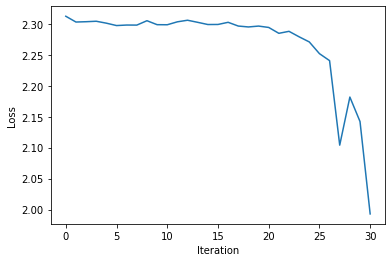

<Figure size 432x288 with 0 Axes>

In [ ]:
print (itr_loss)
plt.plot(itr_loss)
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()
plt.savefig('/Soft_Computing_Dataset/MyDrive/Soft_Computing_Lab/Dataset_A/loss_exp_01.png')

[10.253807106598984, 10.253807106598984, 9.746192893401016, 9.746192893401016, 9.746192893401016, 9.644670050761421, 9.644670050761421, 9.644670050761421, 9.949238578680204, 14.82233502538071, 9.746192893401016, 9.644670050761421, 9.644670050761421, 9.644670050761421, 9.644670050761421, 12.055837563451776, 9.974619289340101, 10.355329949238579, 12.309644670050762, 11.319796954314722, 10.65989847715736, 9.847715736040609, 13.401015228426395, 14.187817258883248, 19.263959390862944, 21.116751269035532, 17.690355329949238, 17.96954314720812, 17.055837563451778, 11.01522842639594, 19.21319796954315]


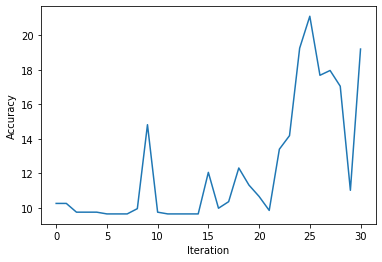

<Figure size 432x288 with 0 Axes>

In [ ]:
print (acc)
plt.plot(acc)
plt.ylabel('Accuracy')
plt.xlabel('Iteration')
plt.show()
plt.savefig('/Soft_Computing_Dataset/MyDrive/Soft_Computing_Lab/Dataset_A/accuracy_exp_01.png')

# Experiment 02

## Hyperparameter & Dataset splitting

In [ ]:
batch_size = 200
num_iters = 20000
input_dim = width * height 
num_hidden = 500
output_dim = 10
split_ratio = 0.20
learning_rate = 0.1

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
dataset_size = len(dataset)
test_size = round(dataset_size * split_ratio)
train_size = dataset_size - test_size

train_set, test_set = torch.utils.data.random_split(dataset, (train_size, test_size))

train_loader = torch.utils.data.DataLoader(dataset=train_set, 
                                           batch_size=batch_size, 
                                           shuffle=True) 

test_loader = torch.utils.data.DataLoader(dataset=test_set, 
                                          batch_size=batch_size, 
                                          shuffle=False)  

num_epochs = num_iters / (len(train_set) / batch_size)
num_epochs = int(num_epochs)
print('Epoch Number: ',num_epochs)
print('Train set: ',len(train_set))
print('Train set: ',len(test_set))
print('Train dataloader: ',len(train_loader))
print('Train dataloader: ',len(test_loader))

Epoch Number:  253
Train set:  15762
Train set:  3940
Train dataloader:  79
Train dataloader:  20


In [ ]:
itr_loss = []
acc = []
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.tanh_1 = nn.Tanh()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.tanh_1(out)

        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
for epoch in range(num_epochs):
  try:
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            itr_loss.append(loss.item())
            acc.append(accuracy)
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
  except Exception as e:
    print(e)

Iteration: 500. Loss: 2.174506425857544. Accuracy: 20.253807106598984
Iteration: 1000. Loss: 2.0629496574401855. Accuracy: 33.934010152284266
Iteration: 1500. Loss: 2.0286710262298584. Accuracy: 24.314720812182742
Iteration: 2000. Loss: 2.0058610439300537. Accuracy: 35.076142131979694
Iteration: 2500. Loss: 1.9166713953018188. Accuracy: 40.53299492385787
Iteration: 3000. Loss: 1.6038531064987183. Accuracy: 37.61421319796954
Iteration: 3500. Loss: 2.132615089416504. Accuracy: 28.274111675126903
Iteration: 4000. Loss: 1.5872573852539062. Accuracy: 43.223350253807105
Iteration: 4500. Loss: 2.1835074424743652. Accuracy: 26.218274111675125
Iteration: 5000. Loss: 1.398881435394287. Accuracy: 55.0
Iteration: 5500. Loss: 1.3103753328323364. Accuracy: 55.101522842639596
Iteration: 6000. Loss: 1.1718462705612183. Accuracy: 68.04568527918782
Iteration: 6500. Loss: 1.221413254737854. Accuracy: 60.98984771573604
Iteration: 7000. Loss: 0.9850444793701172. Accuracy: 61.598984771573605
Iteration: 7500

## Save Model

In [ ]:
torch.save(model.state_dict(), '/Soft_Computing_Dataset/MyDrive/Soft_Computing_Lab/Dataset_A/model_base_exp_2.pkl')

## Visualize Model Result

[2.174506425857544, 2.0629496574401855, 2.0286710262298584, 2.0058610439300537, 1.9166713953018188, 1.6038531064987183, 2.132615089416504, 1.5872573852539062, 2.1835074424743652, 1.398881435394287, 1.3103753328323364, 1.1718462705612183, 1.221413254737854, 0.9850444793701172, 1.1631495952606201, 1.0246074199676514, 0.8191587328910828, 0.8153572678565979, 1.636014461517334, 1.7472060918807983, 0.9267679452896118, 0.45141515135765076, 0.6726619005203247, 0.32038161158561707, 0.9246021509170532, 0.2762712836265564, 0.25763386487960815, 0.31906452775001526, 0.19632020592689514, 0.3020760118961334, 0.13705959916114807, 0.16035065054893494]


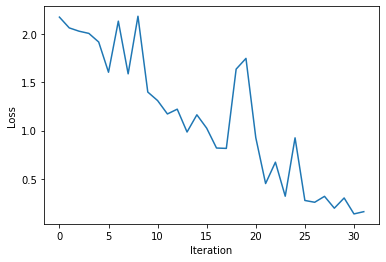

<Figure size 432x288 with 0 Axes>

In [ ]:
print (itr_loss)
plt.plot(itr_loss)
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()
plt.savefig('/Soft_Computing_Dataset/MyDrive/Soft_Computing_Lab/Dataset_A/loss_exp_02.png')

[20.253807106598984, 33.934010152284266, 24.314720812182742, 35.076142131979694, 40.53299492385787, 37.61421319796954, 28.274111675126903, 43.223350253807105, 26.218274111675125, 55.0, 55.101522842639596, 68.04568527918782, 60.98984771573604, 61.598984771573605, 63.756345177664976, 68.78172588832487, 69.54314720812182, 72.20812182741116, 43.756345177664976, 44.263959390862944, 65.0761421319797, 83.85786802030456, 77.91878172588832, 86.29441624365482, 76.7258883248731, 87.91878172588832, 86.09137055837563, 87.76649746192894, 88.42639593908629, 86.11675126903553, 88.60406091370558, 89.16243654822335]


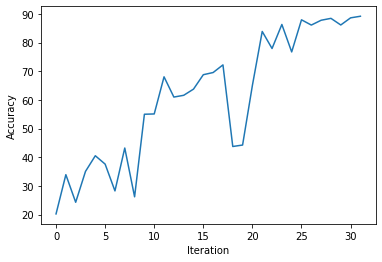

<Figure size 432x288 with 0 Axes>

In [ ]:
print (acc)
plt.plot(acc)
plt.ylabel('Accuracy')
plt.xlabel('Iteration')
plt.show()
plt.savefig('/Soft_Computing_Dataset/MyDrive/Soft_Computing_Lab/Dataset_A/accuracy_exp_02.png')